In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import xgboost
import missingno as msn
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [3]:
df_trans= pd.read_csv('./fraud_detect_data/train_transaction.csv')


In [4]:
y= df_trans['isFraud']
df_trans.drop(columns= 'isFraud', inplace=True)

In [17]:
list(df_trans.columns)

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

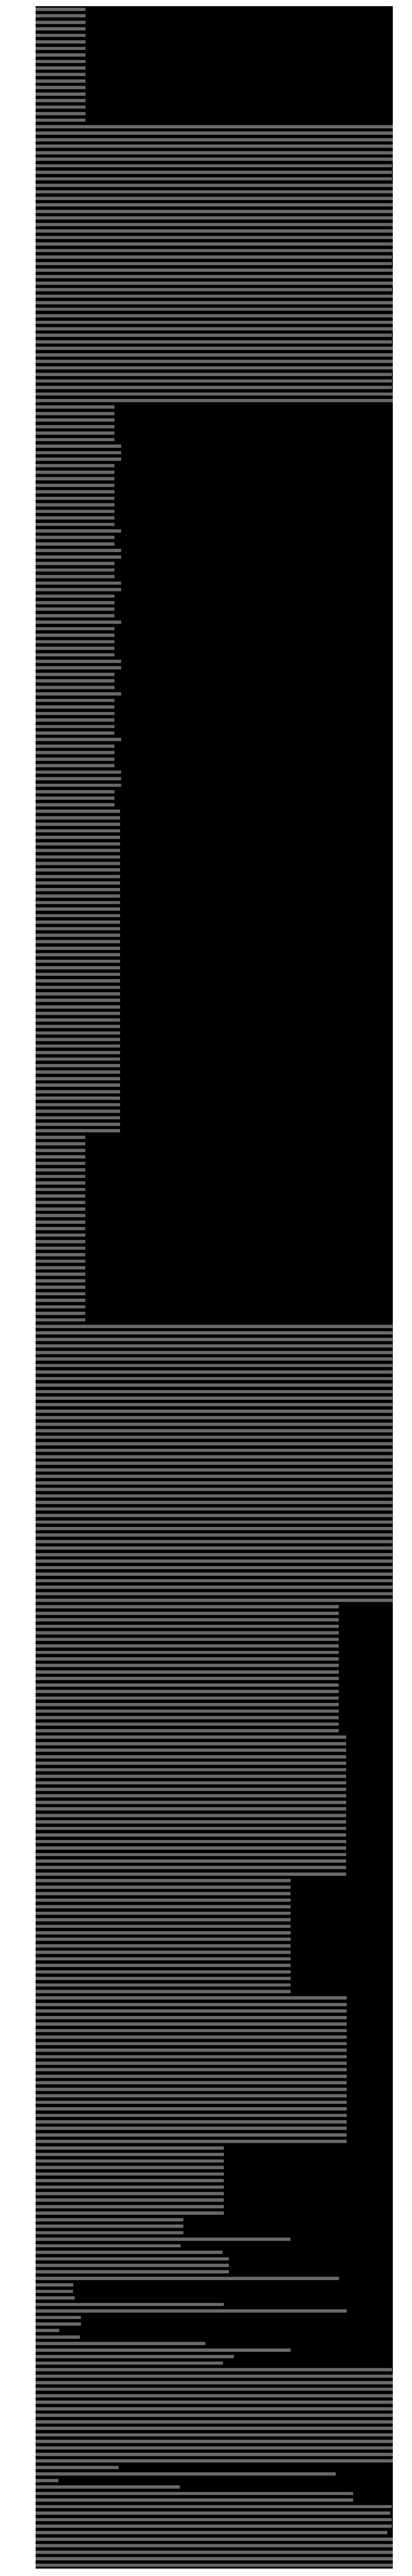

In [5]:
msn.bar(df_trans)
plt.show();

Distributions of IsFraud Counter({0: 569877, 1: 20663})


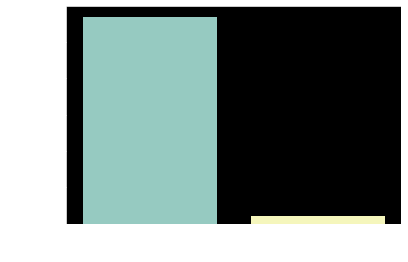

In [11]:
from collections import Counter
print("Distributions of IsFraud {}".format(Counter(y)))
sns.countplot(x= y)
plt.show();

In [14]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(df_trans, y)

In [69]:
print("Distributions of IsFraud {}".format(Counter(y_res)))

Distributions of IsFraud Counter({0: 20663, 1: 20663})


In [15]:
columns= X_res.columns.tolist()
columns.index('V1')

54

In [16]:
X_res= X_res.iloc[:, :54]
X_res.dtypes

TransactionID       int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float64
D8                float64
D9          

In [17]:
X_res_1= X_res.iloc[:, 2:]
columns= X_res_1.columns.tolist()
for k in columns:
    null_vals= X_res_1[k].isnull().sum()
    print(k, " : ",null_vals, " : ", (null_vals)/X_res.shape[0]*100)

TransactionAmt  :  0  :  0.0
ProductCD  :  0  :  0.0
card1  :  0  :  0.0
card2  :  700  :  1.693848908677346
card3  :  85  :  0.2056816531965349
card4  :  88  :  0.21294100566229493
card5  :  335  :  0.8106276920098727
card6  :  85  :  0.2056816531965349
addr1  :  9838  :  23.80583651938247
addr2  :  9838  :  23.80583651938247
dist1  :  28093  :  67.9789962735324
dist2  :  36404  :  88.08982238784301
P_emaildomain  :  6158  :  14.901030828050137
R_emaildomain  :  25525  :  61.764990562841795
C1  :  0  :  0.0
C2  :  0  :  0.0
C3  :  0  :  0.0
C4  :  0  :  0.0
C5  :  0  :  0.0
C6  :  0  :  0.0
C7  :  0  :  0.0
C8  :  0  :  0.0
C9  :  0  :  0.0
C10  :  0  :  0.0
C11  :  0  :  0.0
C12  :  0  :  0.0
C13  :  0  :  0.0
C14  :  0  :  0.0
D1  :  77  :  0.18632337995450804
D2  :  22553  :  54.57339205342884
D3  :  20216  :  48.91835648260175
D4  :  12050  :  29.158399070802883
D5  :  20737  :  50.17906402748875
D6  :  31252  :  75.62309441997775
D7  :  34358  :  83.13894400619465
D8  :  31094  :

In [18]:
X_res_fin= X_res.iloc[:, 2:10]
X_res_fin= pd.concat((X_res_fin, X_res.iloc[:, 16:30]), axis= 1)

In [20]:
X_res_fin.isnull().sum()

TransactionAmt      0
ProductCD           0
card1               0
card2             700
card3              85
card4              88
card5             335
card6              85
C1                  0
C2                  0
C3                  0
C4                  0
C5                  0
C6                  0
C7                  0
C8                  0
C9                  0
C10                 0
C11                 0
C12                 0
C13                 0
C14                 0
dtype: int64

In [89]:
X_res_fin.iloc[:,5:10]

,card2,card3,card4,card5,card6
0,225.0,150.0,mastercard,224.0,debit
1,321.0,150.0,visa,226.0,debit
2,321.0,150.0,visa,226.0,credit
3,562.0,150.0,visa,226.0,credit
4,251.0,150.0,visa,226.0,debit
...,...,...,...,...,...
41321,453.0,150.0,visa,226.0,debit
41322,408.0,185.0,mastercard,224.0,debit
41323,399.0,150.0,american express,146.0,credit
41324,111.0,150.0,visa,226.0,credit


In [21]:
X_res_fin= pd.concat((X_res_fin, y_res), axis= 1)
X_res_fin= X_res_fin.dropna(how= 'any')
y_res=X_res_fin.iloc[:, -1]
X_res_fin.drop(columns='isFraud', inplace=True)

In [22]:
X_res_fin= pd.get_dummies(X_res_fin, columns= ['ProductCD', 'card4', 'card6'])

In [24]:
X_res_fin.shape

(40398, 31)

In [26]:
X_train, x_test, Y_train, y_test= train_test_split(X_res_fin, y_res, test_size= 0.2)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier= DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [63]:
print("THE CONFUSION MATRIX FOR THE DECISION TREE SOLUTION IS: \n",confusion_matrix(dt_classifier.predict(x_test), y_test))

tpr_dt, fpr_dt, thresholds= roc_curve(y_test, dt_classifier.predict(x_test))
auc_dt= auc(tpr_dt, fpr_dt)
print("THE AUC SCORE FOR DECISION TREE MODEL IS: {}".format(auc(tpr_dt, fpr_dt)))


THE CONFUSION MATRIX FOR THE DECISION TREE SOLUTION IS: 
 [[3220  649]
 [ 836 3375]]
THE AUC SCORE FOR DECISION TREE MODEL IS: 0.8163016477074436


In [29]:
rf_classifier= RandomForestClassifier(n_estimators= 50, max_depth= 20, n_jobs= -1, verbose=2)
rf_classifier.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50building tree 12 of 50building tree 13 of 50building tree 14 of 50


building tree 15 of 50building tree 16 of 50


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50building tree 20 of 50
building tree 21 of 50

building tree 22 of 50building tree 23 of 50
building tree 24 of 50

building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50building tree 31 of 50

building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50building tree 38 of 50building tree 39 of 50


building tree 40 of 50
building tree 41 of 50
building tree 42 of 50building tree 43 of 50

building tree 44 of 

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


RandomForestClassifier(max_depth=20, n_estimators=50, n_jobs=-1, verbose=2)

In [71]:
print("THE CONFUSION MATRIX FOR THE Random Forest SOLUTION IS: \n",confusion_matrix(dt_classifier.predict(x_test), y_test))

tpr_rf, fpr_rf, thresholds= roc_curve(y_test, rf_classifier.predict(x_test))
auc_rf= auc(tpr_rf, fpr_rf)
print("THE AUC SCORE FOR Random Forest MODEL IS: {}".format(auc(tpr, fpr)))

THE CONFUSION MATRIX FOR THE Random Forest SOLUTION IS: 
 [[3220  649]
 [ 836 3375]]
THE AUC SCORE FOR Random Forest MODEL IS: 0.797588727987107


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier= AdaBoostClassifier(n_estimators= 150, learning_rate= 1)
ada_classifier.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=150)

In [65]:
print("THE CONFUSION MATRIX FOR THE AdaBoost SOLUTION IS: \n",confusion_matrix(ada_classifier.predict(x_test), y_test))

tpr_ada, fpr_ada, thresholds= roc_curve(y_test, ada_classifier.predict(x_test))
auc_ada= auc(tpr_ada, fpr_ada)
print("THE AUC SCORE FOR AdaBoost MODEL IS: {}".format(auc(tpr, fpr)))

THE CONFUSION MATRIX FOR THE AdaBoost SOLUTION IS: 
 [[3310 1085]
 [ 746 2939]]
THE AUC SCORE FOR AdaBoost MODEL IS: 0.797588727987107


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier= GradientBoostingClassifier(n_estimators= 100, learning_rate= 0.2, max_depth= 3)
gb_classifier.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.2)

In [69]:
print("THE CONFUSION MATRIX FOR THE GradientBoost SOLUTION IS: \n",confusion_matrix(gb_classifier.predict(x_test), y_test))

tpr_gb, fpr_gb, thresholds= roc_curve(y_test, gb_classifier.predict(x_test))
auc_gb= auc(tpr_gb, fpr_gb)
print("THE AUC SCORE FOR GradientBoost MODEL IS: {}".format(auc(tpr, fpr)))

THE CONFUSION MATRIX FOR THE GradientBoost SOLUTION IS: 
 [[3423 1001]
 [ 633 3023]]
THE AUC SCORE FOR GradientBoost MODEL IS: 0.797588727987107


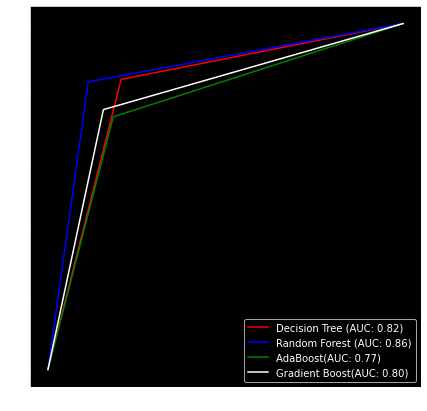

In [77]:
plt.rcParams['figure.figsize']= (7, 7)
plt.plot(tpr_dt, fpr_dt, 'r-')
plt.plot(tpr_rf, fpr_rf, 'b-')
plt.plot(tpr_ada, fpr_ada, 'g-')
plt.plot(tpr_gb, fpr_gb, 'w-')
plt.legend(['Decision Tree (AUC: {:.2f})'.format(auc_dt), 'Random Forest (AUC: {:.2f})'.format(auc_rf),
            'AdaBoost(AUC: {:.2f})'.format(auc_ada), 'Gradient Boost(AUC: {:.2f})'.format(auc_gb)])
plt.show();